# - 군집을 위한 데이터 전처리

## 0. 필요 라이브러리 불러오기

In [1]:
import pandas as pd 
import numpy as np

In [2]:
kio_data=pd.read_csv("data/final_data.csv")
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,2,0,0,2,0,0,1,05-16,14,일
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,0,1,0,2,0,0,05-16,15,일
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,3,3,0,0,0,05-16,15,일
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,3,0,0,0,0,0,0,05-16,15,일
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,2,0,0,2,0,0,0,05-16,16,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2021-05-24 16:00:00,남자,노년,경상도,행복,한식,분식,중식,23.8,0.0,...,0,0,0,0,0,0,1,05-24,16,월
417,2021-05-24 16:00:00,남자,노년,수도권,행복,한식,일식,중식,22.1,0.0,...,0,0,2,0,0,1,0,05-24,16,월
418,2021-05-24 16:00:00,여자,노년,전라도,행복,한식,중식,일식,22.7,0.0,...,0,0,0,1,2,0,0,05-24,16,월
419,2021-05-24 16:00:00,남자,노년,전라도,우울,분식,양식,일식,22.7,0.0,...,0,0,1,0,0,0,0,05-24,16,월


## 2. 데이터 전처리

### 1) 휴일 컬럼 생성
* 평일  / 주말

* 설문 데이터셋의 경우 기간이 짧아 모든 요일을 반영하기 어렵다고 판단

In [3]:
for i in range(len(kio_data)):
    if kio_data.loc[i,"요일"]=="일":
        kio_data.loc[i,"휴일"]= "주말"
    else:
        kio_data.loc[i,"휴일"]= "평일"
        
        
kio_data['휴일'] = kio_data['휴일']

In [4]:
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,0,0,2,0,0,1,05-16,14,일,주말
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,1,0,2,0,0,05-16,15,일,주말
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,3,3,0,0,0,05-16,15,일,주말
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,0,0,0,0,0,0,05-16,15,일,주말
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,0,0,2,0,0,0,05-16,16,일,주말
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2021-05-24 16:00:00,남자,노년,경상도,행복,한식,분식,중식,23.8,0.0,...,0,0,0,0,0,1,05-24,16,월,평일
417,2021-05-24 16:00:00,남자,노년,수도권,행복,한식,일식,중식,22.1,0.0,...,0,2,0,0,1,0,05-24,16,월,평일
418,2021-05-24 16:00:00,여자,노년,전라도,행복,한식,중식,일식,22.7,0.0,...,0,0,1,2,0,0,05-24,16,월,평일
419,2021-05-24 16:00:00,남자,노년,전라도,우울,분식,양식,일식,22.7,0.0,...,0,1,0,0,0,0,05-24,16,월,평일


### 2) 비 컬럼 생성

* 강수 유무로 변경
* 비 X : 비안옴 , 비 O : 비옴

In [5]:
for i in range(len(kio_data)):
    if kio_data.loc[i,"강수량"] == 0:
        kio_data.loc[i,"비"] = "비안옴"
    else:
        kio_data.loc[i,"비"]="비옴"
        
        
kio_data['비'] = kio_data['비']

### 3) 구름 컬럼 생성
* [기상청 전운량](https://www.weather.go.kr/weather/climate/past_cal.jsp)을 기준으로 하여 
* 맑음(0\~5) : 0 , 구름많음(6\~8) : 1, 흐림(9\~10) : 2으로 변경

In [6]:
kio_data.loc[(kio_data['전운량']>=0) & (kio_data['전운량']<=5), '구름']="맑음"

kio_data.loc[(kio_data['전운량']>=6) & (kio_data['전운량']<=8), '구름']="구름많음"

kio_data.loc[(kio_data['전운량']>=9) & (kio_data['전운량']<=10), '구름']="흐림"

kio_data['전운량'].unique()

array([10,  9,  6,  7,  8,  5,  2,  1,  4,  0,  3], dtype=int64)

### 4) 시간대 컬럼생성
* 아침(나머지) : 0 , 점심(11\~16) : 1, 저녁(16\~23) : 2으로 변경

In [7]:
for i in range(len(kio_data)):
    if kio_data.loc[i,"시간"]>=16 and kio_data.loc[i,"시간"]<=23:
        kio_data.loc[i,"식사시간"]="저녁"
    elif kio_data.loc[i,"시간"]>=11 and kio_data.loc[i,"시간"]<16:
        kio_data.loc[i,"식사시간"]='점심'
    else:
        kio_data.loc[i,"식사시간"]="아침"
kio_data["식사시간"] = kio_data["식사시간"]

In [8]:
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,구름,식사시간
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,0,0,1,05-16,14,일,주말,비옴,흐림,점심
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,2,0,0,05-16,15,일,주말,비옴,흐림,점심
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,0,05-16,15,일,주말,비옴,흐림,점심
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,0,0,0,05-16,15,일,주말,비옴,흐림,점심
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,0,0,0,05-16,16,일,주말,비옴,흐림,저녁
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2021-05-24 16:00:00,남자,노년,경상도,행복,한식,분식,중식,23.8,0.0,...,0,0,1,05-24,16,월,평일,비안옴,맑음,저녁
417,2021-05-24 16:00:00,남자,노년,수도권,행복,한식,일식,중식,22.1,0.0,...,0,1,0,05-24,16,월,평일,비안옴,맑음,저녁
418,2021-05-24 16:00:00,여자,노년,전라도,행복,한식,중식,일식,22.7,0.0,...,2,0,0,05-24,16,월,평일,비안옴,맑음,저녁
419,2021-05-24 16:00:00,남자,노년,전라도,우울,분식,양식,일식,22.7,0.0,...,0,0,0,05-24,16,월,평일,비안옴,맑음,저녁


##  클러스터 필요 데이터만 추출 및 전처리

### 인구 통계학부분  더미화
* 기온: 수치형 나머지:범주형
 
 기온을 제외한 나머지 범주형 데이터 더미화

In [9]:
# 더미화가 가능한 데이터만 추출
cate_data=kio_data[["성별","연령대","기분","구름","휴일","식사시간","비"]]

In [10]:
cate_data.columns

Index(['성별', '연령대', '기분', '구름', '휴일', '식사시간', '비'], dtype='object')

In [11]:
# 더미화
cate_dumy_data=pd.get_dummies(cate_data)
cate_dumy_data

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년,기분_분노,기분_우울,기분_중립,기분_행복,구름_구름많음,구름_맑음,구름_흐림,휴일_주말,휴일_평일,식사시간_아침,식사시간_저녁,식사시간_점심,비_비안옴,비_비옴
0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1
1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1
2,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1
3,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1
4,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0
417,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0
418,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0
419,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0


In [12]:
# # 더미데이터의 기온 추가
# kate_dumy_data["기온"]=kio_data["기온"]
# kate_dumy_data

In [13]:
cate_dumy_data.columns

Index(['성별_남자', '성별_여자', '연령대_노년', '연령대_중장년', '연령대_청년', '연령대_청소년', '기분_분노',
       '기분_우울', '기분_중립', '기분_행복', '구름_구름많음', '구름_맑음', '구름_흐림', '휴일_주말',
       '휴일_평일', '식사시간_아침', '식사시간_저녁', '식사시간_점심', '비_비안옴', '비_비옴'],
      dtype='object')

In [14]:
cate_dumy_data.to_csv("data/kate_data.csv",index=False)

### 데이터 표준화 

In [18]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
cate_dumy_data_sd=pd.DataFrame(sd.fit_transform(cate_dumy_data))

In [19]:
cate_dumy_data_sd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.839317,-0.839317,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,-0.332893,-0.889657,1.086898,1.409190,-1.409190,-0.375395,-1.092112,1.416737,-1.162736,1.162736
1,-1.191445,1.191445,-0.367112,1.917753,-0.806834,-0.613039,4.599771,-0.480619,-0.638770,-0.955843,-0.332893,-0.889657,1.086898,1.409190,-1.409190,-0.375395,-1.092112,1.416737,-1.162736,1.162736
2,0.839317,-0.839317,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,1.565509,-0.955843,-0.332893,-0.889657,1.086898,1.409190,-1.409190,-0.375395,-1.092112,1.416737,-1.162736,1.162736
3,-1.191445,1.191445,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,-0.332893,-0.889657,1.086898,1.409190,-1.409190,-0.375395,-1.092112,1.416737,-1.162736,1.162736
4,0.839317,-0.839317,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,-0.332893,-0.889657,1.086898,1.409190,-1.409190,-0.375395,0.915657,-0.705847,-1.162736,1.162736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0.839317,-0.839317,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,-0.332893,1.124029,-0.920050,-0.709628,0.709628,-0.375395,0.915657,-0.705847,0.860040,-0.860040
417,0.839317,-0.839317,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,-0.332893,1.124029,-0.920050,-0.709628,0.709628,-0.375395,0.915657,-0.705847,0.860040,-0.860040
418,-1.191445,1.191445,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,-0.332893,1.124029,-0.920050,-0.709628,0.709628,-0.375395,0.915657,-0.705847,0.860040,-0.860040
419,0.839317,-0.839317,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,2.080652,-0.638770,-0.955843,-0.332893,1.124029,-0.920050,-0.709628,0.709628,-0.375395,0.915657,-0.705847,0.860040,-0.860040


In [20]:
cate_dumy_data_sd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.839317,-0.839317,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,-0.332893,-0.889657,1.086898,1.409190,-1.409190,-0.375395,-1.092112,1.416737,-1.162736,1.162736
1,-1.191445,1.191445,-0.367112,1.917753,-0.806834,-0.613039,4.599771,-0.480619,-0.638770,-0.955843,-0.332893,-0.889657,1.086898,1.409190,-1.409190,-0.375395,-1.092112,1.416737,-1.162736,1.162736
2,0.839317,-0.839317,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,1.565509,-0.955843,-0.332893,-0.889657,1.086898,1.409190,-1.409190,-0.375395,-1.092112,1.416737,-1.162736,1.162736
3,-1.191445,1.191445,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,-0.332893,-0.889657,1.086898,1.409190,-1.409190,-0.375395,-1.092112,1.416737,-1.162736,1.162736
4,0.839317,-0.839317,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,-0.332893,-0.889657,1.086898,1.409190,-1.409190,-0.375395,0.915657,-0.705847,-1.162736,1.162736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0.839317,-0.839317,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,-0.332893,1.124029,-0.920050,-0.709628,0.709628,-0.375395,0.915657,-0.705847,0.860040,-0.860040
417,0.839317,-0.839317,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,-0.332893,1.124029,-0.920050,-0.709628,0.709628,-0.375395,0.915657,-0.705847,0.860040,-0.860040
418,-1.191445,1.191445,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,-0.332893,1.124029,-0.920050,-0.709628,0.709628,-0.375395,0.915657,-0.705847,0.860040,-0.860040
419,0.839317,-0.839317,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,2.080652,-0.638770,-0.955843,-0.332893,1.124029,-0.920050,-0.709628,0.709628,-0.375395,0.915657,-0.705847,0.860040,-0.860040


In [21]:
# 본래 열 이름으로 변경
cate_dumy_data_sd.rename(columns={0:'남자',1:'여자',2:'노년',3:'중장년',4:'청년',5:'청소년',6:'분노',7:'우울',8:'중립',
               9:'행복',10:'구름많음',11:'맑음',12:'흐림',13:'주말',14:'평일',15:'아침',16:'저녁',17:'점심',18:"비안옴",19:"비옴"},inplace=True)

In [22]:
cate_dumy_data_sd.columns

Index(['남자', '여자', '노년', '중장년', '청년', '청소년', '분노', '우울', '중립', '행복', '구름많음',
       '맑음', '흐림', '주말', '평일', '아침', '저녁', '점심', '비안옴', '비옴'],
      dtype='object')

## 군집전 컬럼별 상관관계

In [23]:
%matplotlib inline 

# 한글 문제 해결
# matplotlib의 기본폰트에서 한글이 지원되지 않음
# 시스템별로 한글 지원하는 폰트로 변경해야 함

import platform
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
## heatmap 그리기 

def corr_heat_map(data,method,figsize):
    # corr
    result=data.corr(method=method)
    
    #figsize
    fig, ax = plt.subplots(figsize=(figsize, figsize))
    
    return sns.heatmap(result,
            annot = True,
           fmt = '.2f',
           cmap = 'Greens',
           vmin = -1, vmax=1)

<AxesSubplot:>

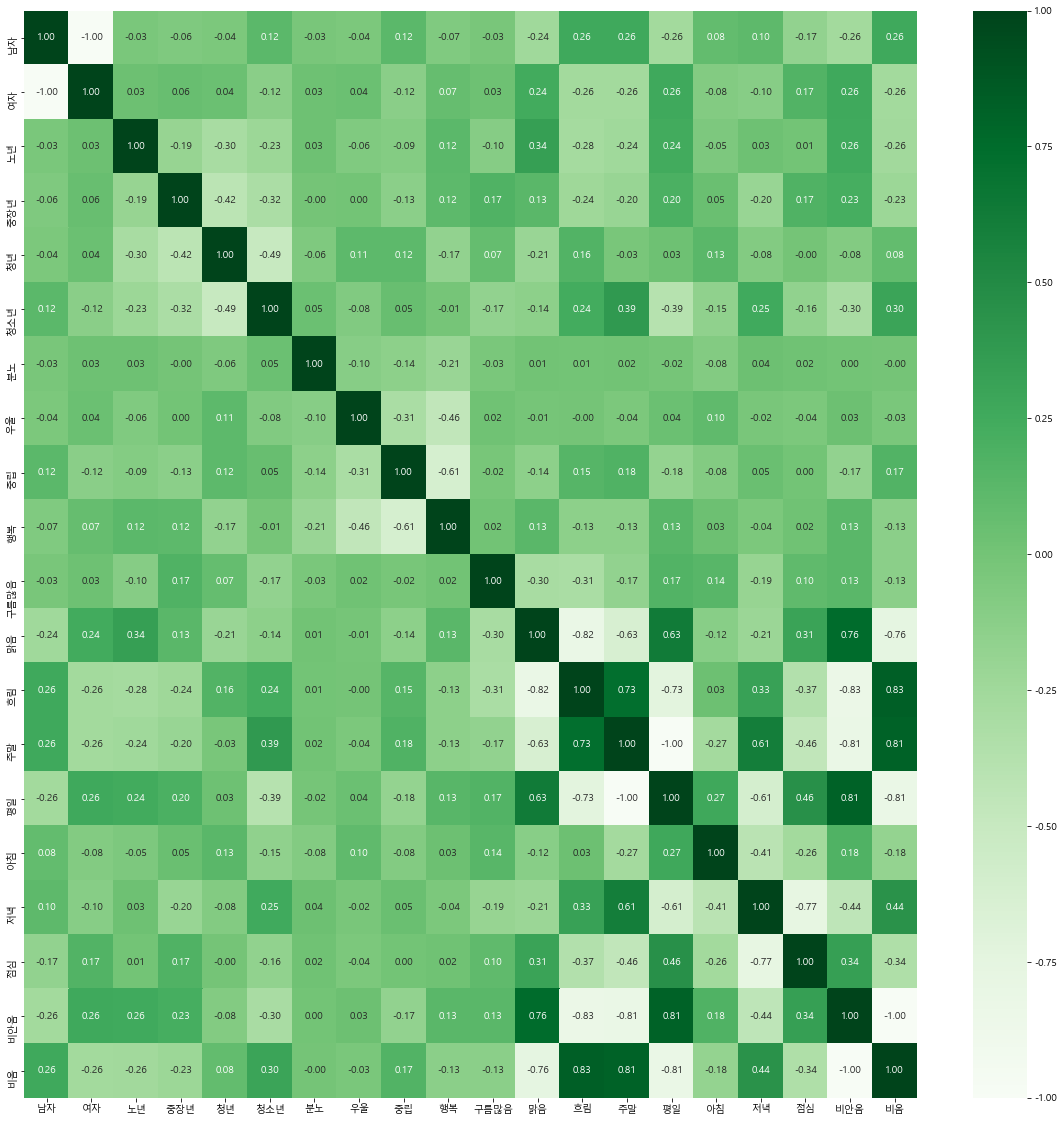

In [24]:
corr_heat_map(cate_dumy_data_sd,"kendall",20)

## kmedoids 군집

In [25]:
cluster_data=cate_dumy_data_sd.copy()
silhuette_data=cate_dumy_data_sd.copy()

### elbow method

C:\Users\JUNG MIN GUE\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
C:\Users\JUNG MIN GUE\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
C:\Users\JUNG MIN GUE\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
C:\Users\JUNG MIN GUE\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
C:\Users\JUNG MIN GUE\anaconda3\lib\site-packages\sklearn_extra\

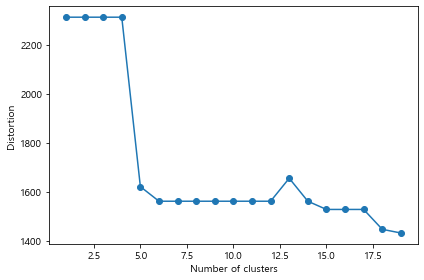

In [26]:
from sklearn_extra.cluster import KMedoids
dist =[]
for i in range(1,20):
    k = KMedoids(n_clusters=i, random_state=0)
    k.fit(cluster_data)
    dist.append(k.inertia_)

plt.plot(range(1,20),dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [33]:
total_sd_arr = cluster_data.values

#k값을 4로 설정 후 k-means에 적용시키기
kmedoids = KMedoids(n_clusters =5,random_state=200).fit(total_sd_arr)
kmedoids.cluster_centers_

C:\Users\JUNG MIN GUE\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
C:\Users\JUNG MIN GUE\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
C:\Users\JUNG MIN GUE\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(


array([[ 0.83931725, -0.83931725, -0.36711155, -0.5214435 , -0.80683356,
         1.6312172 , -0.21740212, -0.48061851, -0.63876972,  1.04619662,
        -0.33289329, -0.88965688,  1.08689795,  1.4091897 , -1.4091897 ,
        -0.375395  ,  0.91565711, -0.70584746, -1.16273613,  1.16273613,
         0.        ],
       [ 0.83931725, -0.83931725, -0.36711155, -0.5214435 ,  1.239413  ,
        -0.61303915, -0.21740212, -0.48061851,  1.5655094 , -0.95584327,
        -0.33289329,  1.12402885, -0.92004958, -0.70962767,  0.70962767,
        -0.375395  , -1.09211187,  1.41673669,  0.86004036, -0.86004036,
         1.        ],
       [ 0.83931725, -0.83931725, -0.36711155, -0.5214435 ,  1.239413  ,
        -0.61303915, -0.21740212, -0.48061851, -0.63876972,  1.04619662,
        -0.33289329,  1.12402885, -0.92004958, -0.70962767,  0.70962767,
        -0.375395  ,  0.91565711, -0.70584746,  0.86004036, -0.86004036,
         2.        ],
       [ 0.83931725, -0.83931725, -0.36711155, -0.5214435 

In [28]:
cluster_data['cluster'] = kmedoids.labels_
cluster_data

,남자,여자,노년,중장년,청년,청소년,분노,우울,중립,행복,...,맑음,흐림,주말,평일,아침,저녁,점심,비안옴,비옴,cluster
0,0.839317,-0.839317,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,-0.889657,1.086898,1.409190,-1.409190,-0.375395,-1.092112,1.416737,-1.162736,1.162736,0
1,-1.191445,1.191445,-0.367112,1.917753,-0.806834,-0.613039,4.599771,-0.480619,-0.638770,-0.955843,...,-0.889657,1.086898,1.409190,-1.409190,-0.375395,-1.092112,1.416737,-1.162736,1.162736,0
2,0.839317,-0.839317,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,1.565509,-0.955843,...,-0.889657,1.086898,1.409190,-1.409190,-0.375395,-1.092112,1.416737,-1.162736,1.162736,1
3,-1.191445,1.191445,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,-0.889657,1.086898,1.409190,-1.409190,-0.375395,-1.092112,1.416737,-1.162736,1.162736,0
4,0.839317,-0.839317,-0.367112,-0.521443,1.239413,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,-0.889657,1.086898,1.409190,-1.409190,-0.375395,0.915657,-0.705847,-1.162736,1.162736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0.839317,-0.839317,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,1.124029,-0.920050,-0.709628,0.709628,-0.375395,0.915657,-0.705847,0.860040,-0.860040,2
417,0.839317,-0.839317,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,1.124029,-0.920050,-0.709628,0.709628,-0.375395,0.915657,-0.705847,0.860040,-0.860040,2
418,-1.191445,1.191445,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,-0.480619,-0.638770,1.046197,...,1.124029,-0.920050,-0.709628,0.709628,-0.375395,0.915657,-0.705847,0.860040,-0.860040,2
419,0.839317,-0.839317,2.723968,-0.521443,-0.806834,-0.613039,-0.217402,2.080652,-0.638770,-0.955843,...,1.124029,-0.920050,-0.709628,0.709628,-0.375395,0.915657,-0.705847,0.860040,-0.860040,2


In [32]:
import warnings 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist

## TSNE 시각화

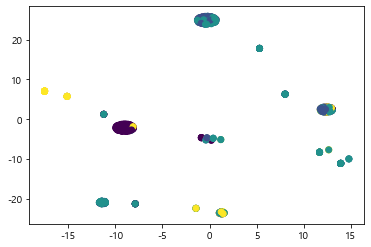

In [30]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(cluster_data.iloc[:,:8])

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=kmedoids.labels_)

plt.show()